# Hyperparameter Tuning with Python

# Import Libraries

In [64]:
import pandas as pd
import numpy as np

# Import Datasets

* Diabetes
* Heart Failure
* FB Live
* Telco Churn (assignment)

In [65]:
# load datasets
diabetes = pd.read_csv('diabetes.csv')
heart = pd.read_csv('heart_failure.csv')
live = pd.read_csv('fb_live.csv')

In [66]:
# show first 5 columns of data
# data dictionary can be found at 
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [67]:
# show first 5 columns of data
# data dictionary can be found at
# https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [68]:
# show first 5 columns of data
live.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2,150,0,0,150,0,0,0,0,0
1,4,111,0,0,111,0,0,0,0,0
2,5,213,0,0,204,9,0,0,0,0
3,6,217,6,0,211,5,1,0,0,0
4,9,203,1,0,198,5,0,0,0,0


It seems that `num_reactions` is the sum of of various reactions on its right hand side columns. This is a **redundant feature**.

# Penalized Regression

## Ridge Regression Diabetes

In [69]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns='Y').to_numpy()
y = diabetes[['Y']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [70]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [71]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (1, 5, 10, 100, 1000)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1, 5, 10, 100, 1000)},
             scoring='neg_root_mean_squared_error')

In [72]:
# the complete results
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006965,0.004978,0.001600,0.001009,1,{'alpha': 1},-52.734960,-58.939397,-52.169364,-56.568450,-59.384949,-55.959424,3.024801,1
1,0.008441,0.012125,0.001815,0.000682,5,{'alpha': 5},-53.341484,-59.025954,-52.515817,-56.856280,-58.586232,-56.065153,2.674480,2
2,0.003203,0.001035,0.001594,0.001160,10,{'alpha': 10},-53.815410,-59.099286,-52.841186,-57.140543,-58.233700,-56.226025,2.465398,3
3,0.002075,0.000420,0.001488,0.000583,100,{'alpha': 100},-55.528805,-59.053487,-54.192443,-58.534177,-57.744986,-57.010779,1.853198,4
4,0.002094,0.001002,0.002313,0.001863,1000,{'alpha': 1000},-56.468875,-58.895568,-54.704524,-60.455113,-57.801872,-57.665190,1.975495,5


In [73]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1},-55.959424,1
1,{'alpha': 5},-56.065153,2
2,{'alpha': 10},-56.226025,3
3,{'alpha': 100},-57.010779,4
4,{'alpha': 1000},-57.665190,5


**Finding: the best alpha (lambda) is 1**

In [74]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=1, random_state=42)

In [75]:
# the coefficients of the best estimator (exclude intercept)
ridge_reg_gridcv.best_estimator_.coef_

array([  0.14269511, -22.80861461,   5.90541998,   1.19867986,
        -1.07900835,   0.62662466,   0.3774738 ,   9.77013169,
        60.79394666,   0.21396887])

In [76]:
# the intercept of the best estimator
ridge_reg_gridcv.best_estimator_.intercept_

-319.81247103842054

In [77]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + diabetes.drop(columns='Y').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,-319.812471
1,AGE,0.142695
2,SEX,-22.808615
3,BMI,5.905420
4,BP,1.198680
5,S1,-1.079008
6,S2,0.626625
7,S3,0.377474
8,S4,9.770132
9,S5,60.793947


Still remember how to interpret the coefficients? :)

## LASSO
Left as exercise

In [78]:
# the same thing, but we use Lasso
from sklearn.linear_model import Lasso

# somehow need to enlarge max_iter values
lasso_reg = Lasso(max_iter=10000, random_state=42)

In [79]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': ( 1, 4, 10, 100)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': (1, 4, 10, 100)},
             scoring='neg_root_mean_squared_error')

In [80]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1},-56.274778,1
1,{'alpha': 4},-57.445817,2
2,{'alpha': 10},-57.596767,3
3,{'alpha': 100},-63.584052,4


In [81]:
lasso_reg_gridcv.best_estimator_

Lasso(alpha=1, max_iter=10000, random_state=42)

In [82]:
lasso_reg_gridcv.best_estimator_.intercept_

-207.39204615204054

In [83]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + diabetes.drop(columns='Y').columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,-207.392046
1,AGE,0.134680
2,SEX,-17.764437
3,BMI,6.219863
4,BP,1.168763
5,S1,-0.006980
6,S2,-0.258590
7,S3,-0.995180
8,S4,3.131840
9,S5,31.576498


# K-NN Classification

In [84]:
# will use this dataset
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [85]:
# split the data 
from sklearn.model_selection import train_test_split

X = heart.drop(columns='DEATH_EVENT').to_numpy()
y = heart[['DEATH_EVENT']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
# It's important to choose the right metric when doing classification
heart['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

The class distribution is IMBALANCE, so need NOT to use `accuracy`. Use `recall` (sensitivity) instead! DEATH is the most expensive thing to incure!

In [87]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [88]:
%%time
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 633 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [89]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.069524,6
1,{'n_neighbors': 3},0.295238,1
2,{'n_neighbors': 4},0.099048,5
3,{'n_neighbors': 5},0.169524,2
4,{'n_neighbors': 6},0.112381,4
5,{'n_neighbors': 7},0.140952,3
6,{'n_neighbors': 8},0.057143,7


In [90]:
%%time
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

CPU times: total: 328 ms
Wall time: 530 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [91]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.295238,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.252381,2
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.224762,3
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.210476,4
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.210476,4
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.197143,6
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.181905,7
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.169524,8
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.154286,9
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.140952,10


It seems that the recall is uniformly low... It suggests that K-NN model may underfit the data. Will try to use Random Forest later in below.

### Evaluation metrics on test data

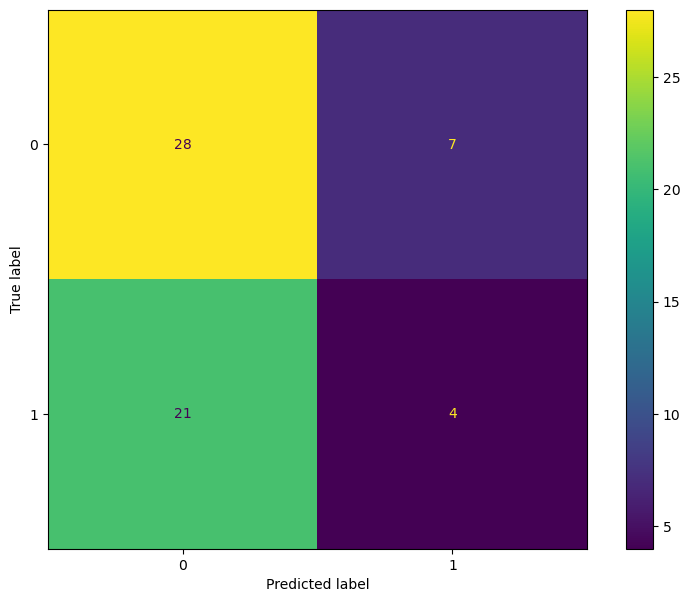

In [92]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [93]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        35
           1       0.36      0.16      0.22        25

    accuracy                           0.53        60
   macro avg       0.47      0.48      0.44        60
weighted avg       0.48      0.53      0.48        60



TIP: Just focus on the row '1'.
<br>
Finding: Yep, our model is not that good. The recall score on test data is only 0.16.

# K-means Clustering
*Spoiler: we won't use grid search CV*

In [94]:
# fb live data
live.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2,150,0,0,150,0,0,0,0,0
1,4,111,0,0,111,0,0,0,0,0
2,5,213,0,0,204,9,0,0,0,0
3,6,217,6,0,211,5,1,0,0,0
4,9,203,1,0,198,5,0,0,0,0


In [95]:
# check column names
live.columns

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [96]:
# drop unnecessary columns
# num_reactions is also dropped since it can be derived from the other columns in the dataset
X = live.drop(columns=['status_id','num_reactions']).to_numpy()

from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

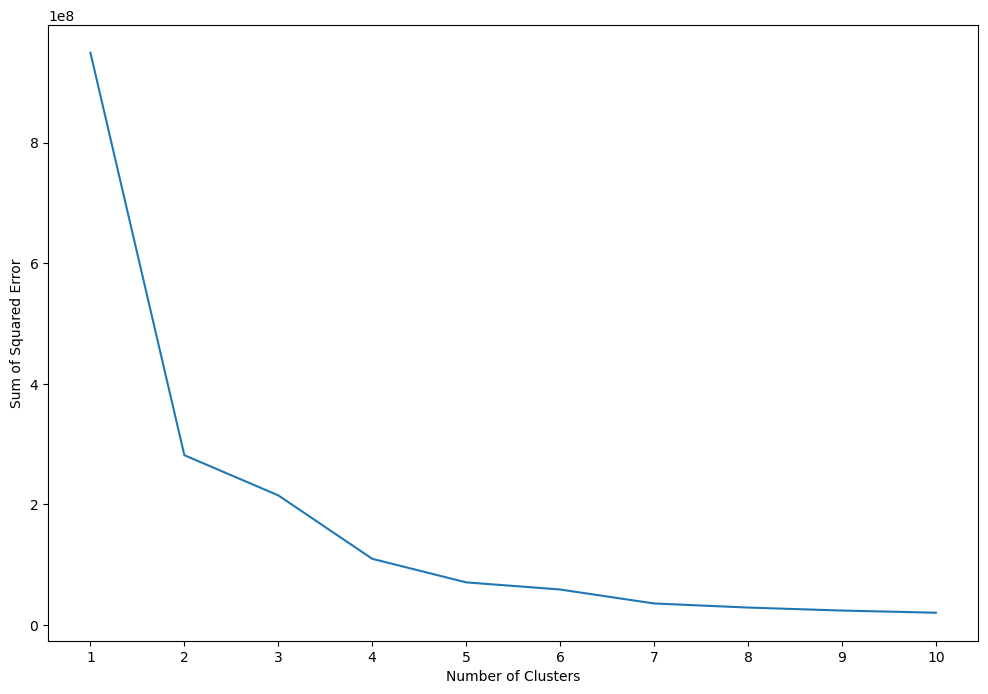

In [97]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

The elbow point is at K=2

In [98]:
# run kmeans with the optimal K
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# clusters' centroid analysis
# derive average of each feature (column)
live['cluster'] = kmeans.labels_
centroid_df = live.groupby('cluster')[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','status_id']].agg({'num_reactions': 'mean', 'num_comments': 'mean', 'num_shares':'mean',
                                                                             'num_likes':'mean',
                                                                             'num_loves': 'mean', 'num_wows': 'mean', 'num_hahas':'mean',
                                                                             'num_sads': 'mean', 'num_angrys': 'mean','status_id':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'status_id':'num_status'})
centroid_df

,cluster,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_status
0,0,91.96201,13.778431,1.801961,89.724265,1.285049,0.569363,0.185294,0.147059,0.047794,4080
1,1,1933.50000,59.442308,17.302885,1925.610577,4.586538,2.947115,0.298077,0.052885,0.004808,208


Try yourself to interpret the results!

# Random Forest

In [99]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = heart.drop(columns='DEATH_EVENT').to_numpy()
y = heart[['DEATH_EVENT']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [100]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [101]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: total: 5.7 s
Wall time: 8.78 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

It takes > 5 seconds to finish

In [107]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
12,"{'max_depth': 3, 'n_estimators': 30}",0.761905,1
24,"{'max_depth': 5, 'n_estimators': 50}",0.746667,2
11,"{'max_depth': 3, 'n_estimators': 20}",0.745714,3
22,"{'max_depth': 5, 'n_estimators': 30}",0.732381,4
19,"{'max_depth': 4, 'n_estimators': 50}",0.719048,5
17,"{'max_depth': 4, 'n_estimators': 30}",0.719048,5
23,"{'max_depth': 5, 'n_estimators': 40}",0.718095,7
13,"{'max_depth': 3, 'n_estimators': 40}",0.704762,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.703810,9
21,"{'max_depth': 5, 'n_estimators': 20}",0.703810,9


If we want to speed up the training process, we may use RandomizedSearchCV

In [108]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: total: 2.23 s
Wall time: 3.41 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

Now it only takes way less seconds (compared to >5 seconds when using the full GridSearchCV)

In [109]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,"{'n_estimators': 50, 'max_depth': 5}",0.746667,1
6,"{'n_estimators': 20, 'max_depth': 3}",0.745714,2
3,"{'n_estimators': 50, 'max_depth': 4}",0.719048,3
8,"{'n_estimators': 40, 'max_depth': 5}",0.718095,4
5,"{'n_estimators': 20, 'max_depth': 5}",0.703810,5
4,"{'n_estimators': 10, 'max_depth': 5}",0.689524,6
9,"{'n_estimators': 50, 'max_depth': 3}",0.648571,7
0,"{'n_estimators': 20, 'max_depth': 2}",0.605714,8
1,"{'n_estimators': 30, 'max_depth': 1}",0.253333,9
2,"{'n_estimators': 20, 'max_depth': 1}",0.183810,10


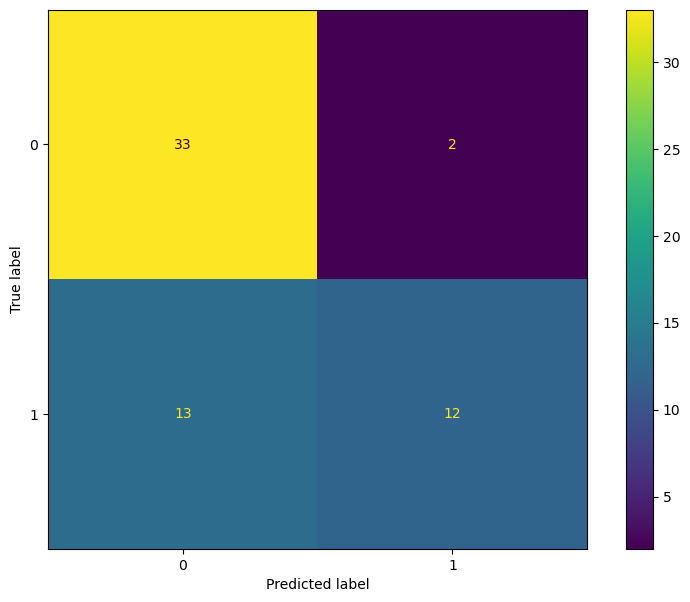

In [105]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [110]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60



So much better than our previous K-NN model!